In [1]:
import json
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

from functions import Util

path_data = './data'
path_img = path_data + '/imgs'
path_csv = path_data + '/csv'
path_geojson = path_data + '/geojson'
level = 'regioni'
file_name_r = path_csv + '/covid19-' + level + '.csv'
map_region = path_geojson + '/Italy_NUTS_2.json'

In [2]:
# Read geojson NUTS 2 file
with open(map_region, encoding='utf-8') as map_geojson_r:
    map_json_r = json.load(map_geojson_r)
properties = map_json_r['features'][0]['properties']
properties

{'reg_name': 'Piemonte', 'reg_istat_code_num': 1, 'reg_istat_code': '01'}

In [3]:
df_r = pd.read_csv(file_name_r)
last_date = df_r.data[0].split('T')[0]
# df_r.sort_values(by='codice_regione').reset_index(drop=True)
df_r.columns
# totale_ospedalizzati = ricoverati_con_sintomi + terapia_intensiva
# totale_positivi = totale_ospedalizzati + isolamento_domiciliare
# variazione_totale_positivi = totale_positivi(S) - totale_positivi(S - 1)
# totale_casi = totale_positivi + dimessi_guariti + deceduti

Index(['data', 'codice_regione', 'denominazione_regione',
       'ricoverati_con_sintomi', 'terapia_intensiva', 'totale_ospedalizzati',
       'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'totale_casi', 'tamponi', 'casi_testati', 'popolazione',
       'variazione_ricoverati_con_sintomi', 'variazione_terapia_intensiva',
       'variazione_totale_ospedalizzati', 'variazione_isolamento_domiciliare',
       'variazione_nuovi_positivi', 'nuovi_tamponi', 'nuovi_casi_testati',
       'nuovi_deceduti', 'nuovi_dimessi_guariti', 'np_su_nt', 'np_su_p',
       'tc_su_p'],
      dtype='object')

In [4]:
# Print stats
print('Nuovi positivi:', df_r['nuovi_positivi'].sum())
print('Nuovi tamponi:', df_r['nuovi_tamponi'].sum())
print('Percentuale nuovi positivi/nuovi tamponi:', (df_r['nuovi_positivi'].sum()/df_r['nuovi_tamponi'].sum()).round(4) * 100, '%')
print('Nuovi guariti:', df_r['nuovi_dimessi_guariti'].sum())
print('Nuovi deceduti:', df_r['nuovi_deceduti'].sum())
print('Variazione positivi ricoverati con sintomi:', df_r['variazione_ricoverati_con_sintomi'].sum())
print('Variazione positivi in terapia intensiva:', df_r['variazione_terapia_intensiva'].sum())
print('Variazione positivi in isolamento dimiciliare:', df_r['variazione_isolamento_domiciliare'].sum())
# print(df_r['nuovi_casi_testati'].sum())

Nuovi positivi: 7332
Nuovi tamponi: 152196
Percentuale nuovi positivi/nuovi tamponi: 4.82 %
Nuovi guariti: 2037
Nuovi deceduti: 43
Variazione positivi ricoverati con sintomi: 394
Variazione positivi in terapia intensiva: 25
Variazione positivi in isolamento dimiciliare: 4833


In [5]:
# Set interactive
interactive = False

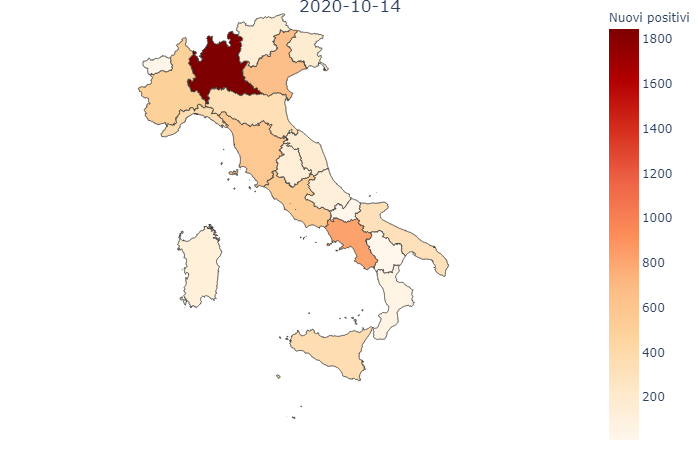

In [6]:
# Map of new positives by region
fig = Util.choropleth_map(df=df_r,
                          geojson=map_json_r,
                          color='nuovi_positivi',
                          title=last_date,
                          color_title='Nuovi positivi',
                          locations='denominazione_regione',
                          featureidkey='properties.reg_name',
                          interactive=interactive)
# Save img
image_name_out = 'nuovi_positivi'
fig.write_image('{path}/{name}.png'.format(path=path_img, name=image_name_out))

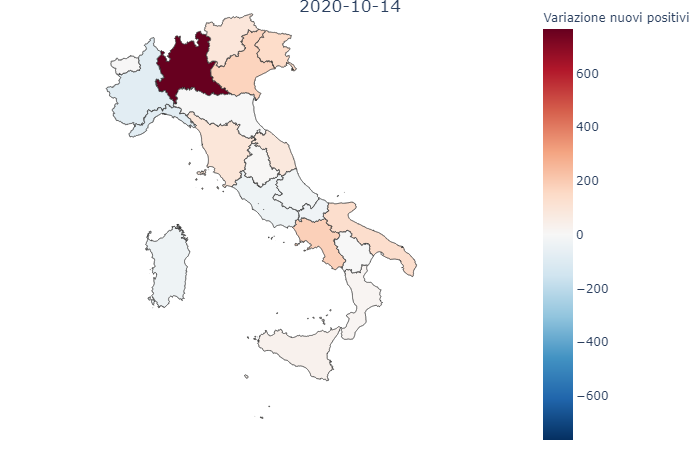

In [7]:
# Map of variation of new positives with respect to the day before
fig = Util.choropleth_map(df=df_r,
                          geojson=map_json_r,
                          color='variazione_nuovi_positivi',
                          color_continuous_scale=px.colors.sequential.RdBu,
                          color_continuous_midpoint=0,
                          reversescale=True,
                          title=last_date,
                          color_title='Variazione nuovi positivi',
                          locations='denominazione_regione',
                          featureidkey='properties.reg_name',
                          interactive=interactive)
image_name_out = 'variazione_nuovi_positivi'
fig.write_image('{path}/{name}.png'.format(path=path_img, name=image_name_out))

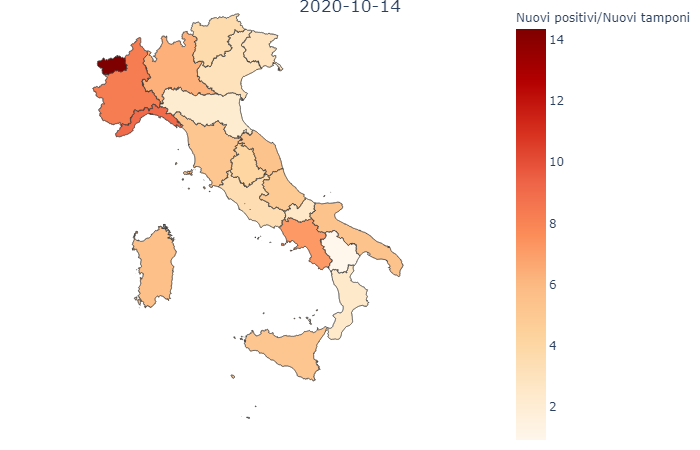

In [8]:
# Map of new positives on new swabs per region
fig = Util.choropleth_map(df=df_r,
                          geojson=map_json_r,
                          color='np_su_nt',
                          title=last_date,
                          color_title='Nuovi positivi/Nuovi tamponi',
                          locations='denominazione_regione',
                          featureidkey='properties.reg_name',
                          interactive=interactive)
image_name_out = 'nuovi_positivi_su_nuovi_tamponi'
fig.write_image('{path}/{name}.png'.format(path=path_img, name=image_name_out))

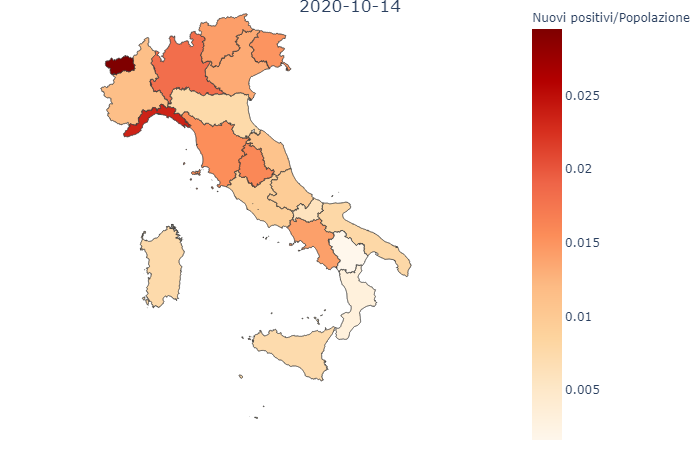

In [9]:
# Map of new positives on pupulation
fig = Util.choropleth_map(df=df_r,
                          geojson=map_json_r,
                          color='np_su_p',
                          title=last_date,
                          color_title='Nuovi positivi/Popolazione',
                          locations='denominazione_regione',
                          featureidkey='properties.reg_name',
                          interactive=interactive)
image_name_out = 'nuovi_positivi_su_popolazione'
fig.write_image('{path}/{name}.png'.format(path=path_img, name=image_name_out))

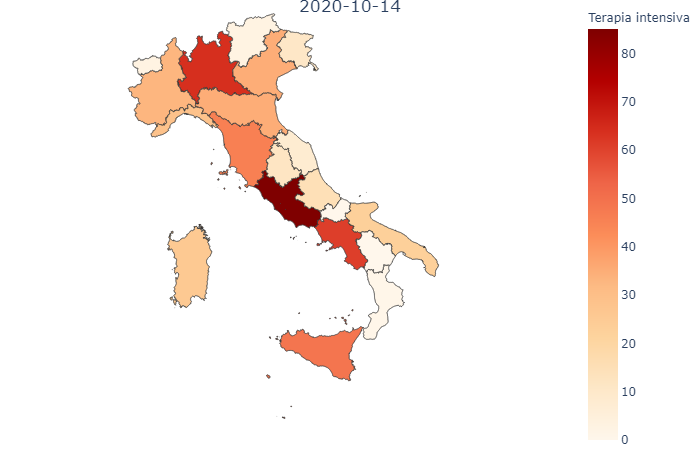

In [10]:
# Map of positives in ICU
fig = Util.choropleth_map(df=df_r,
                          geojson=map_json_r,
                          color='terapia_intensiva',
                          title=last_date,
                          color_title='Terapia intensiva',
                          locations='denominazione_regione',
                          featureidkey='properties.reg_name',
                          interactive=interactive)
image_name_out = 'terapia_intensiva'
fig.write_image('{path}/{name}.png'.format(path=path_img, name=image_name_out))

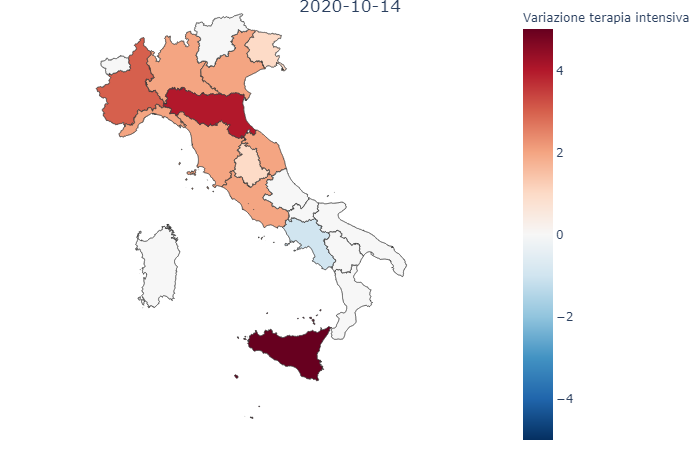

In [11]:
# Map of variation of positives in ICU with respect to the day before
fig = Util.choropleth_map(df=df_r,
                          geojson=map_json_r,
                          color='variazione_terapia_intensiva',
                          color_continuous_scale=px.colors.sequential.RdBu,
                          color_continuous_midpoint=0,
                          reversescale=True,
                          title=last_date,
                          color_title='Variazione terapia intensiva',
                          locations='denominazione_regione',
                          featureidkey='properties.reg_name',
                          interactive=interactive)
image_name_out = 'variazione_terapia_intensiva'
fig.write_image('{path}/{name}.png'.format(path=path_img, name=image_name_out))

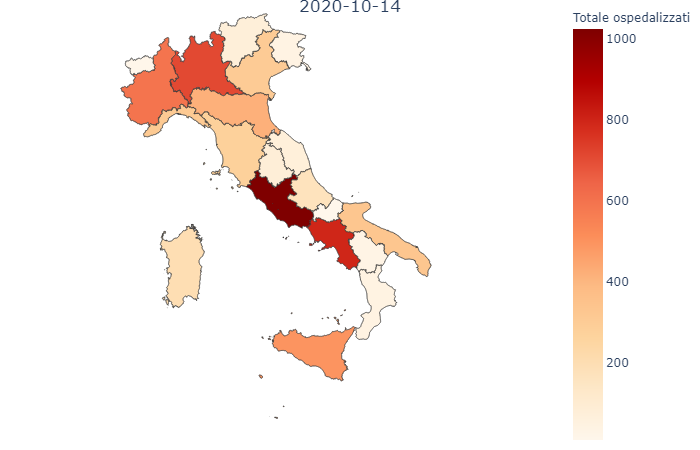

In [12]:
# Map of hospitalized positives
fig = Util.choropleth_map(df=df_r,
                          geojson=map_json_r,
                          color='totale_ospedalizzati',
                          title=last_date,
                          color_title='Totale ospedalizzati',
                          locations='denominazione_regione',
                          featureidkey='properties.reg_name',
                          interactive=interactive)
image_name_out = 'totale_ospedalizzati'
fig.write_image('{path}/{name}.png'.format(path=path_img, name=image_name_out))

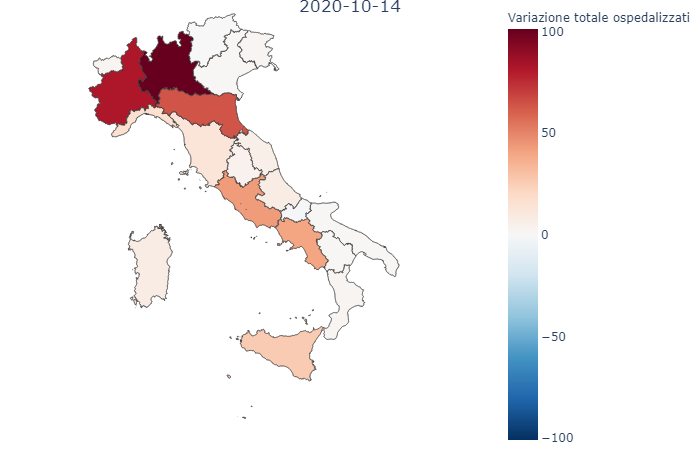

In [13]:
# Map of variation of hospitalized positives with respect to the day before
fig = Util.choropleth_map(df=df_r,
                          geojson=map_json_r,
                          color='variazione_totale_ospedalizzati',
                          color_continuous_scale=px.colors.sequential.RdBu,
                          color_continuous_midpoint=0,
                          reversescale=True,
                          title=last_date,
                          color_title='Variazione totale ospedalizzati',
                          locations='denominazione_regione',
                          featureidkey='properties.reg_name',
                          interactive=interactive)
image_name_out = 'variazione_totale_ospedalizzati'
fig.write_image('{path}/{name}.png'.format(path=path_img, name=image_name_out))

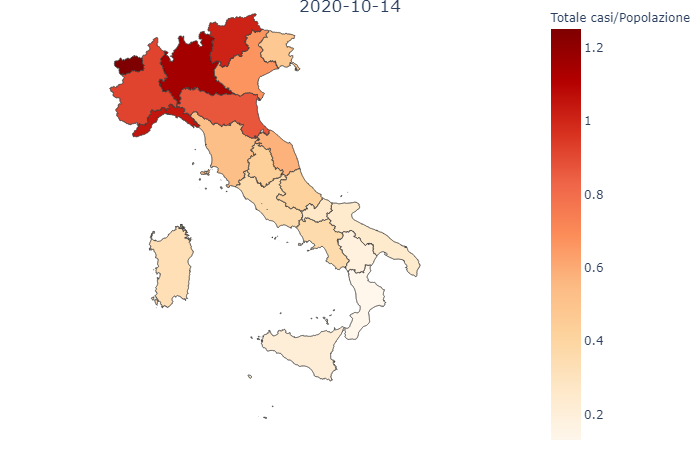

In [14]:
# Map of variation of total number of positives on population from the beginning of the pandemic
fig = Util.choropleth_map(df=df_r,
                          geojson=map_json_r,
                          color='tc_su_p',
                          title=last_date,
                          color_title='Totale casi/Popolazione',
                          locations='denominazione_regione',
                          featureidkey='properties.reg_name',
                          interactive=interactive)
image_name_out = 'totale_casi_su_popolazione'
fig.write_image('{path}/{name}.png'.format(path=path_img, name=image_name_out))